In [1]:
@time using Plots
@time using Images
@time using ColorSchemes

 45.701020 seconds (25.80 M allocations: 1.357 GiB, 2.99% gc time)
 16.684858 seconds (8.81 M allocations: 468.579 MiB, 0.81% gc time)
  0.001442 seconds (581 allocations: 28.328 KiB)


In [2]:
function neighbourIndices(nType::Int64, rad::Int64)
    indices = []
    if(nType == 0)
        indices = vcat([[i, 0] for i in -rad:rad], [[0, j] for j in -rad:rad])
    elseif(nType == 1)
        indices = [[i, j] for i in -rad:rad for j in -rad:rad]
    elseif(nType == 2)
        indices = [[i, j] for j in -rad:rad for i in (abs(j) - rad):(rad - abs(j))]
    end
    
    indices = [CartesianIndex(ind...) for ind in setdiff(indices, [[0,0]])]
end

neighbourIndices (generic function with 1 method)

In [43]:
function colormap(z0, cType)
    if cType == 1
        colors = range(RGB{N0f8}(0.0,0.0,0.0), stop=RGB{N0f8}(0,0.8,0.8), length = z0+5)
    end
    
    cmap = Dict(zip(0:z0+4, colors))
end

colormap (generic function with 1 method)

In [51]:
function setInitConditions(grid, init, z0, indices)
    if(init[1] == "random")
        grid = rand(0:z0, size(grid)...)

    elseif(init[1] == "uniform")
        grid .+= init[2]
    end
    
    return
end

setInitConditions (generic function with 1 method)

In [113]:
function Sandpile(n, z0, rad, nsteps, anim, fname, init, bValue, drop)
    sandbox = zeros(Int8, (n + 2*rad, n + 2*rad))
    frames = []
    
    relNeighbour = neighbourIndices(2, rad) #relative index of neighbours
    indices = [CartesianIndex(i,j) for i in (rad+1):(n+rad) for j in (rad+1):(n+rad)]
    borders = filter(x -> !(x in indices), CartesianIndices(sandbox))
    
    #initial conditions
    setInitConditions(sandbox, init, z0, indices)
    
    #boundary conditions; fixed
    sandbox[borders] .= bValue
    
    prev = copy(sandbox) #copy of the grid
    push!(frames, copy(sandbox))
    
    for k in 2:nsteps
        for index in indices
            if(prev[index] >= z0)
                sandbox[index] -= 4
                sandbox[relNeighbour .|> x-> x + index] .+= 1
            end
        end
        
        #external driving
        sandbox[drop...] += 1
        
        #boundary conditions
        sandbox[borders] .= bValue
        
        prev = copy(sandbox)
        push!(frames, copy(sandbox))
        
    end
    
    if(anim)
        cmap = colormap(z0+5, 1)
        animGIF = @animate for i ∈ 1:nsteps 
            plot([cmap[p] for p in frames[i]])
        end
        
        gif(animGIF, fname, fps = 15)
    end
end

Sandpile (generic function with 4 methods)

 11.184193 seconds (5.92 M allocations: 218.949 MiB, 0.55% gc time)


┌ Info: Saved animation to 
│   fn = /home/akshay/code-repo/ComplexSystems/outputs/sandpile3.gif
└ @ Plots /home/akshay/.julia/packages/Plots/uCh2y/src/animation.jl:104


Plots.AnimatedGif("/home/akshay/code-repo/ComplexSystems/outputs/sandpile3.gif")
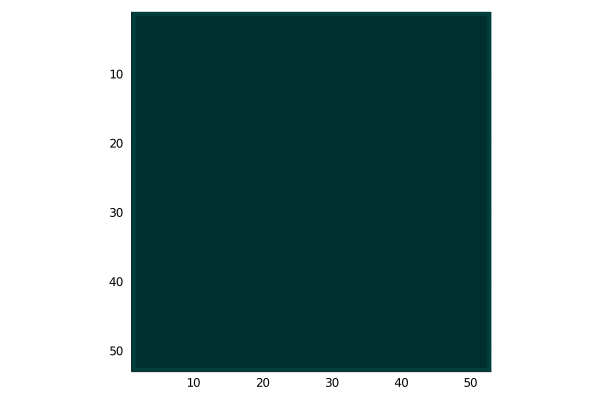

In [124]:
@time Sandpile(51, 4, 1, 200, true, "outputs/sandpile3.gif", ["uniform", 3], 4, [27, 27])